DATASET

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
gtd = pd.read_csv("globalterrorismdb_0718dist.csv",encoding='ISO-8859-1')

/var/folders/4p/xsshwcpd61ddwg_493_fyfyw0000gn/T/ipykernel_1820/1209304822.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  gtd = pd.read_csv("globalterrorismdb_0718dist.csv",encoding='ISO-8859-1')


In [3]:
gtd.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
gtd_df = gtd[['eventid', 'iyear','success','imonth', 'iday', 'country_txt','region_txt','suicide', 'attacktype1_txt', 'targtype1_txt', 'target1','nkill']]

In [5]:
gtd_df.head(3)

,eventid,iyear,success,imonth,iday,country_txt,region_txt,suicide,attacktype1_txt,targtype1_txt,target1,nkill
0,197000000001,1970,1,7,2,Dominican Republic,Central America & Caribbean,0,Assassination,Private Citizens & Property,Julio Guzman,1.0
1,197000000002,1970,1,0,0,Mexico,North America,0,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",0.0
2,197001000001,1970,1,1,0,Philippines,Southeast Asia,0,Assassination,Journalists & Media,Employee,1.0


In [6]:
pd.set_option('display.max_rows', None)

Data Cleaning& Wrangling

In [7]:
gtd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   eventid          181691 non-null  int64  
 1   iyear            181691 non-null  int64  
 2   success          181691 non-null  int64  
 3   imonth           181691 non-null  int64  
 4   iday             181691 non-null  int64  
 5   country_txt      181691 non-null  object 
 6   region_txt       181691 non-null  object 
 7   suicide          181691 non-null  int64  
 8   attacktype1_txt  181691 non-null  object 
 9   targtype1_txt    181691 non-null  object 
 10  target1          181053 non-null  object 
 11  nkill            171378 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 16.6+ MB


In [8]:
gtd_df.isnull().sum()

eventid                0
iyear                  0
success                0
imonth                 0
iday                   0
country_txt            0
region_txt             0
suicide                0
attacktype1_txt        0
targtype1_txt          0
target1              638
nkill              10313
dtype: int64

In [9]:
gtd_df['target1'] = gtd_df['target1'].fillna('Unknown')

/var/folders/4p/xsshwcpd61ddwg_493_fyfyw0000gn/T/ipykernel_1820/1850819235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gtd_df['target1'] = gtd_df['target1'].fillna('Unknown')


In [10]:
gtd_df['nkill'] = gtd_df['nkill'].fillna(0.0)

/var/folders/4p/xsshwcpd61ddwg_493_fyfyw0000gn/T/ipykernel_1820/4205845754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gtd_df['nkill'] = gtd_df['nkill'].fillna(0.0)


In [11]:
gtd_df.isnull().sum()

eventid            0
iyear              0
success            0
imonth             0
iday               0
country_txt        0
region_txt         0
suicide            0
attacktype1_txt    0
targtype1_txt      0
target1            0
nkill              0
dtype: int64

EDA

In [12]:
yearly_attacks = gtd_df.groupby('iyear').size().reset_index(name='count')

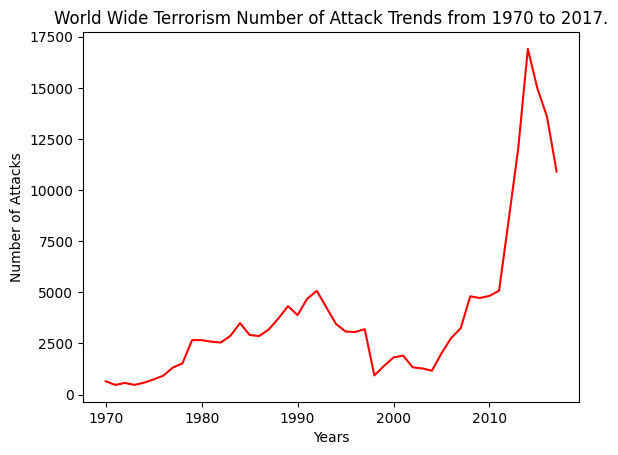

In [13]:
sns.lineplot(x='iyear', y='count', data=yearly_attacks, color= "red")
plt.xlabel('Years')
plt.ylabel('Number of Attacks')
plt.title('World Wide Terrorism Number of Attack Trends from 1970 to 2017.')
plt.show()

Terrorist Attack trends based on the region

In [14]:
yearly_attacks_region = gtd_df.groupby(['iyear', 'region_txt']).size().reset_index(name='count')

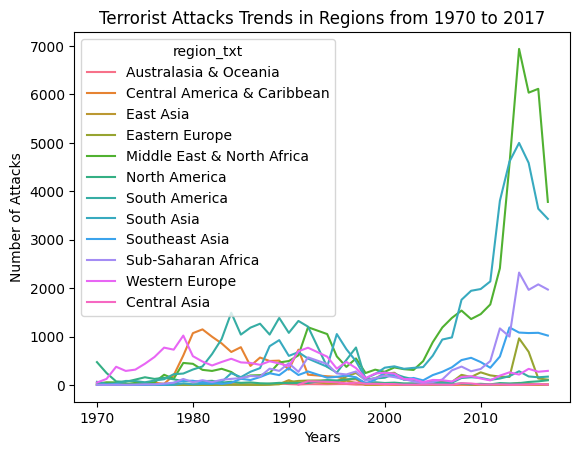

In [15]:
sns.lineplot(x='iyear', y='count',hue='region_txt', data=yearly_attacks_region )
plt.title('Terrorist Attacks Trends in Regions from 1970 to 2017')
plt.xlabel('Years')
plt.ylabel('Number of Attacks')
plt.show()

In [ ]:
Countries with the most terrorist attacks

In [19]:
country_attacks = gtd_df.groupby('country_txt').size().reset_index(name='count').sort_values(by='count', ascending = False)
top5_country = country_attacks.head(5)

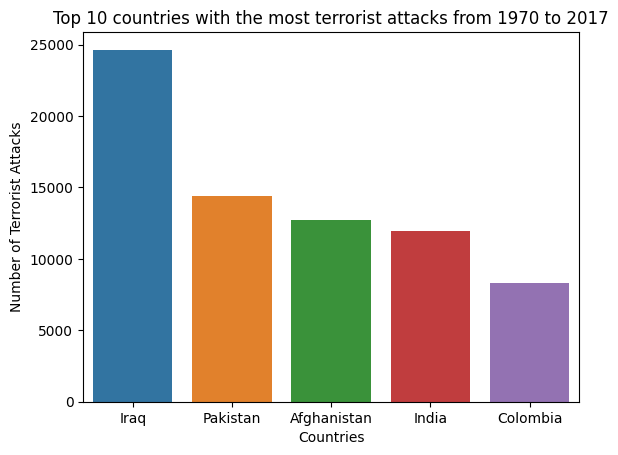

In [20]:
sns.barplot(x='country_txt', y='count', data=top5_country)
plt.title('Top 10 countries with the most terrorist attacks from 1970 to 2017')
plt.xlabel('Countries')
plt.ylabel('Number of Terrorist Attacks')
plt.show()

In [21]:
narrow_2017 = gtd_df[gtd_df['iyear'] >= 2012]
narrow_2017_count = narrow_2017.groupby(['iyear', 'country_txt']).size().reset_index(name='count')

# Get the top 5 countries for each year
narrow_2017_count_5 = narrow_2017_count.groupby('iyear').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)

<Axes: xlabel='iyear', ylabel='count'>

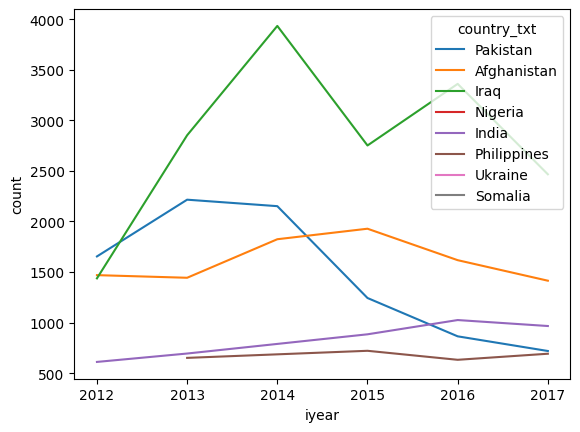

In [22]:
sns.lineplot(x='iyear', y='count', hue='country_txt', data=narrow_2017_count_5)

In [23]:
gtd_df.head(1)

,eventid,iyear,success,imonth,iday,country_txt,region_txt,suicide,attacktype1_txt,targtype1_txt,target1,nkill
0,197000000001,1970,1,7,2,Dominican Republic,Central America & Caribbean,0,Assassination,Private Citizens & Property,Julio Guzman,1.0


World Wide Outcome of a terrorist attack

In [24]:
total_count = gtd_df['success'].count()
success = gtd_df.groupby('success').size().reset_index(name="count")
success['percentage'] = (success['count'] / total_count) * 100

In [25]:
success

,success,count,percentage
0,0,20059,11.040173
1,1,161632,88.959827


Text(0.5, 1.0, 'Success rate of Terrorist attacks from 2012 to 2017')

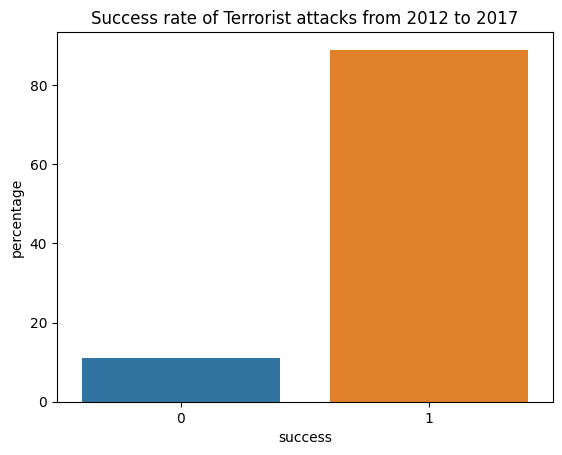

In [26]:
sns.barplot(x='success', y= 'percentage',data = success)
plt.title('Success rate of Terrorist attacks from 2012 to 2017')

In [27]:
attack_type = gtd_df.groupby(['attacktype1_txt', 'success']).size().reset_index(name="count")
attack_type

,attacktype1_txt,success,count
0,Armed Assault,0,2324
1,Armed Assault,1,40345
2,Assassination,0,4697
3,Assassination,1,14615
4,Bombing/Explosion,0,10725
5,Bombing/Explosion,1,77530
6,Facility/Infrastructure Attack,0,577
7,Facility/Infrastructure Attack,1,9779
8,Hijacking,0,80
9,Hijacking,1,579


Text(0, 0.5, 'Number of Attacks')

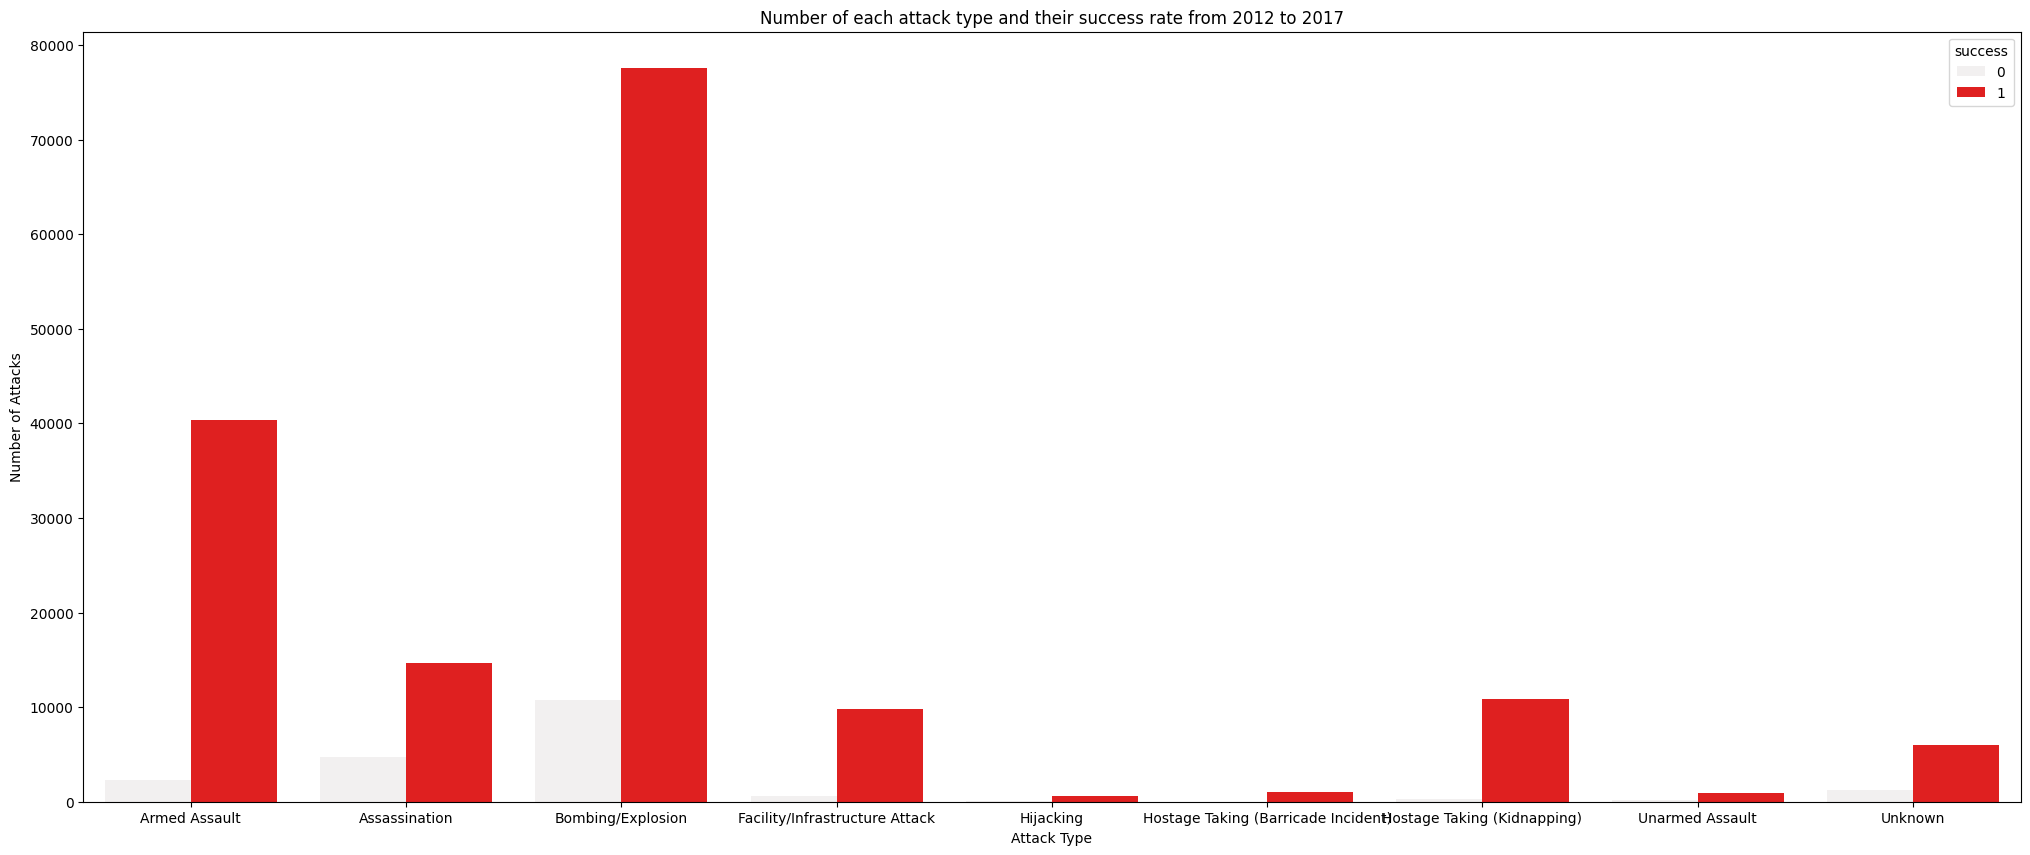

In [28]:
plt.figure(figsize=(25,10))
plt.title('Number of each attack type and their success rate from 2012 to 2017')
sns.barplot(x='attacktype1_txt', y='count', hue='success', data=attack_type, color= "red")
plt.xlabel('Attack Type')
plt.ylabel('Number of Attacks')

Casualties due to Terrorist Attacks around the world

In [29]:
nkills_attack = gtd_df.groupby('attacktype1_txt')[['nkill']].sum().reset_index()
nkills_attack

,attacktype1_txt,nkill
0,Armed Assault,160297.0
1,Assassination,24920.0
2,Bombing/Explosion,157321.0
3,Facility/Infrastructure Attack,3642.0
4,Hijacking,3718.0
5,Hostage Taking (Barricade Incident),4478.0
6,Hostage Taking (Kidnapping),24231.0
7,Unarmed Assault,880.0
8,Unknown,32381.0


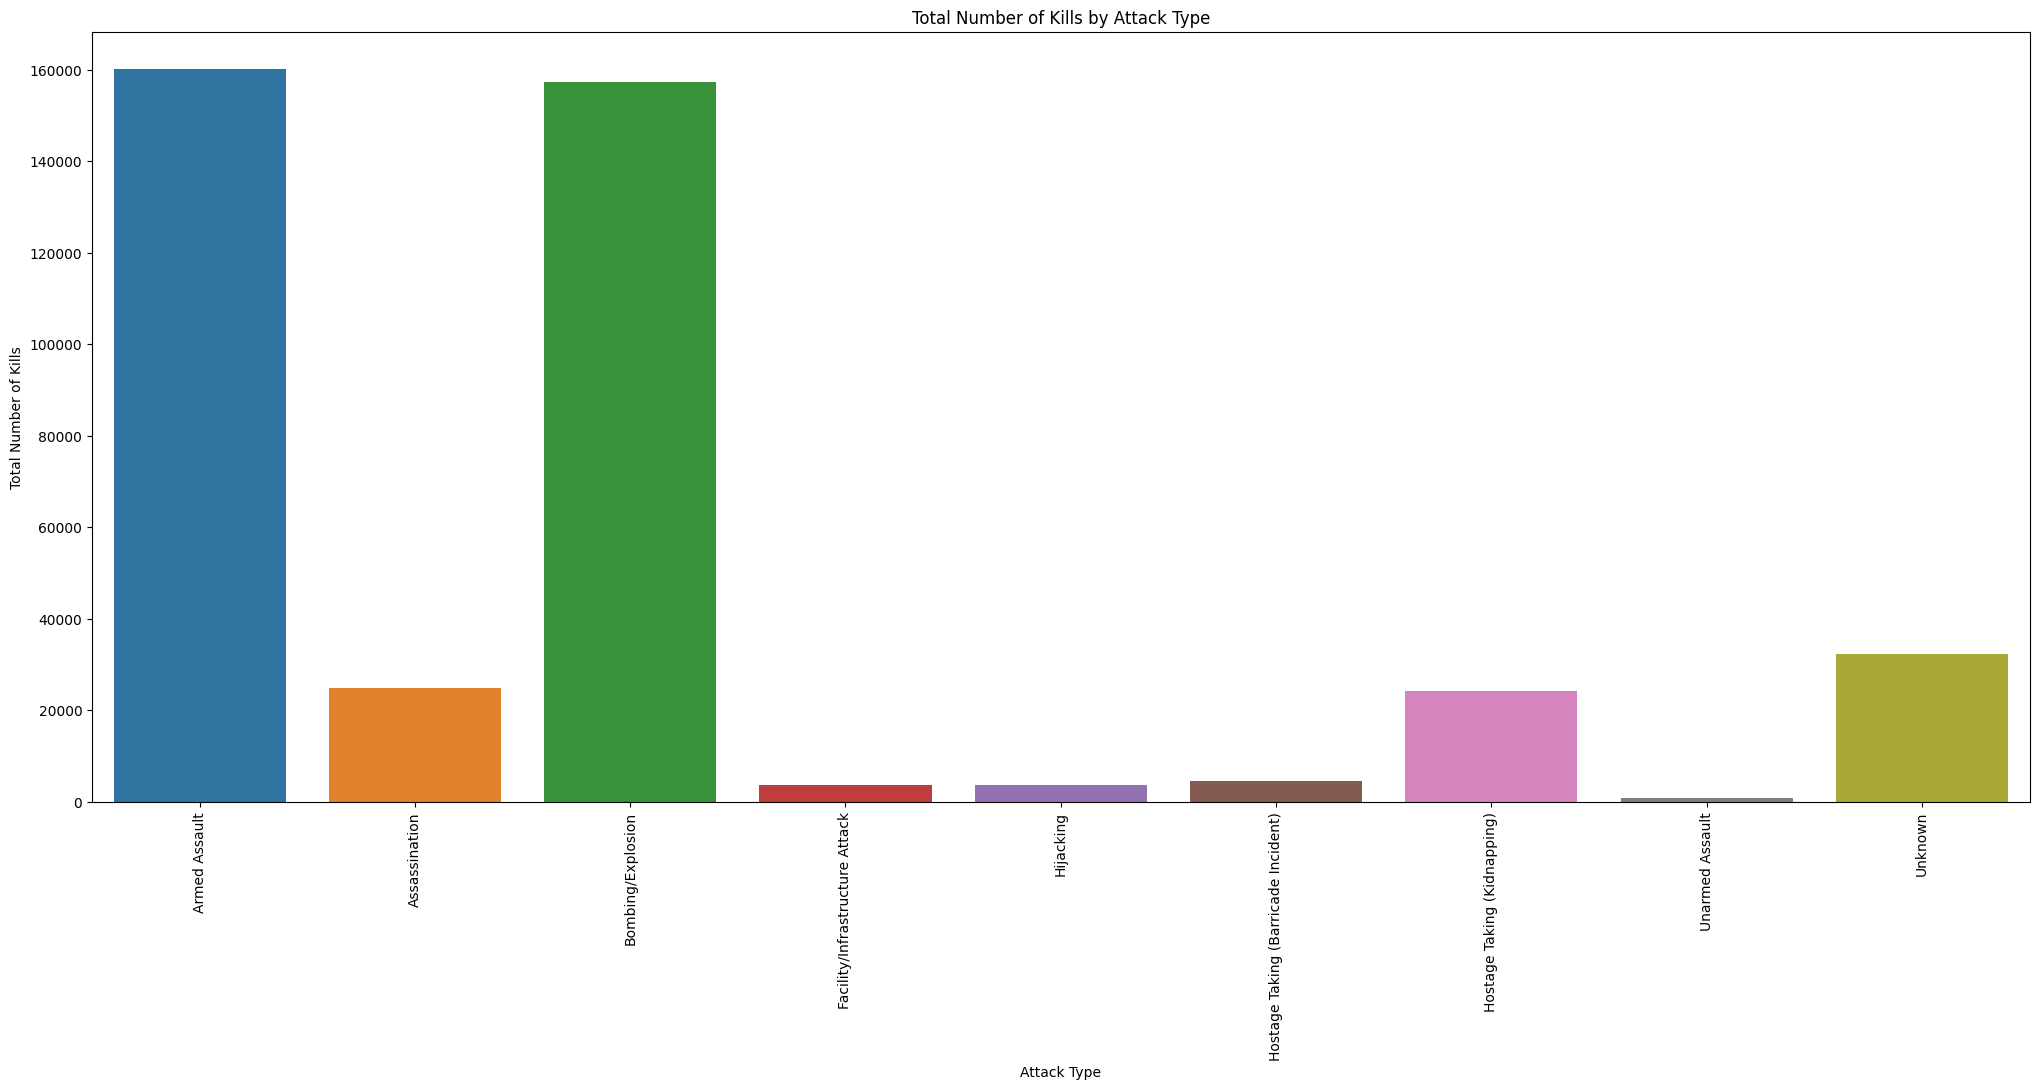

In [30]:
 plt.figure(figsize=(25,10))
sns.barplot(x='attacktype1_txt', y='nkill', data=nkills_attack)
plt.xlabel('Attack Type')
plt.ylabel('Total Number of Kills')
plt.title('Total Number of Kills by Attack Type')
plt.xticks(rotation=90)
plt.show()

In [32]:
mycountries = gtd_df[(gtd_df['country_txt'] == 'India') | (gtd_df['country_txt'] == 'Pakistan')]
mycountries.head(2)

,eventid,iyear,success,imonth,iday,country_txt,region_txt,suicide,attacktype1_txt,targtype1_txt,target1,nkill
585,197011010001,1970,1,11,1,Pakistan,South Asia,0,Assassination,Government (Diplomatic),Deputy Foreign Minister: Zygfryd Wolniak,4.0
1186,197202220004,1972,1,2,22,India,South Asia,0,Hijacking,Airports & Aircraft,B-747,0.0


Terrorist Attacks in India

In [33]:
india = gtd_df[(gtd_df['country_txt'] =='India')]
num_ofattacks = india.groupby('iyear').size().reset_index(name="count")
num_ofattacks

,iyear,count
0,1972,1
1,1975,1
2,1976,1
3,1977,1
4,1979,20
5,1980,10
6,1981,16
7,1982,13
8,1983,47
9,1984,159


In [36]:
ind_sumattacks = num_ofattacks['count'].sum()
ind_sumattacks
print('Total Number of attacks in India is', ind_sumattacks)

Total Number of attacks in India is 11960


<Axes: title={'center': 'Yearly Trend of Terrorist Attcks in India from 1974 t0 2017'}, xlabel='Year', ylabel='Number of Attacks'>

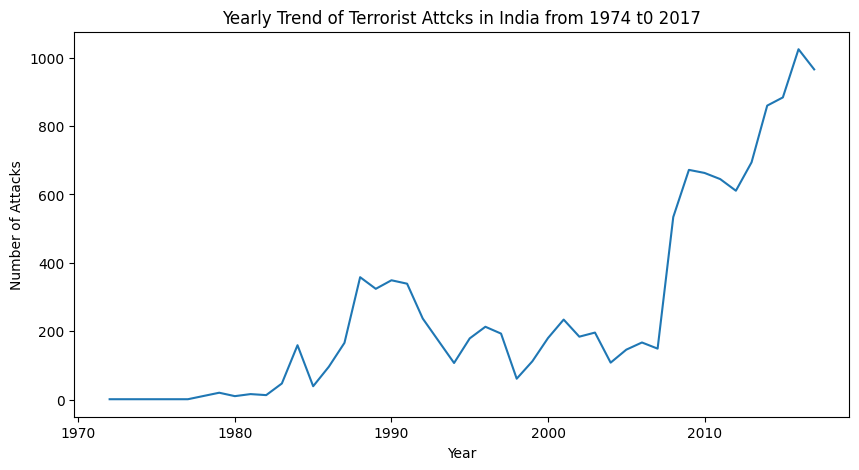

In [37]:
plt.figure(figsize=(10,5))
plt.title("Yearly Trend of Terrorist Attcks in India from 1974 t0 2017")
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
sns.lineplot(x="iyear", y="count", data=num_ofattacks)

In [38]:
succ_ind = india.groupby(['success']).size().reset_index(name='count')
succ_ind['percentage'] = succ_ind['count']/ ind_sumattacks *100
succ_ind

,success,count,percentage
0,0,1680,14.046823
1,1,10280,85.953177


Text(0.5, 0, 'Outcome')

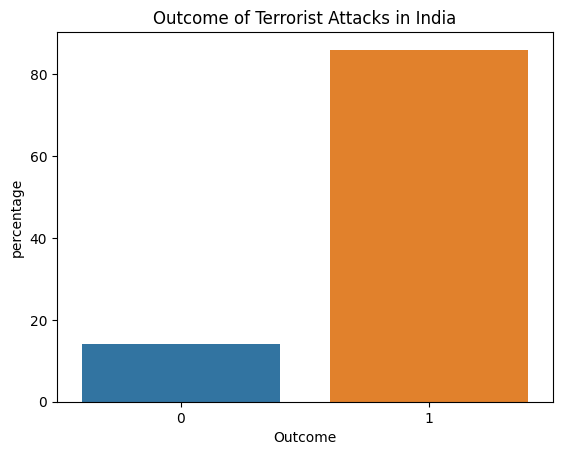

In [39]:
sns.barplot(x = 'success', y = 'percentage', data=succ_ind)
plt.title("Outcome of Terrorist Attacks in India")
plt.xlabel("Outcome")

In [40]:
india_atype= india.groupby(['attacktype1_txt','success']).size().reset_index(name='count')
india_atype


,attacktype1_txt,success,count
0,Armed Assault,0,244
1,Armed Assault,1,2940
2,Assassination,0,228
3,Assassination,1,1001
4,Bombing/Explosion,0,1128
5,Bombing/Explosion,1,3697
6,Facility/Infrastructure Attack,0,33
7,Facility/Infrastructure Attack,1,963
8,Hijacking,0,4
9,Hijacking,1,39


Text(0.5, 0, 'Attack Type')

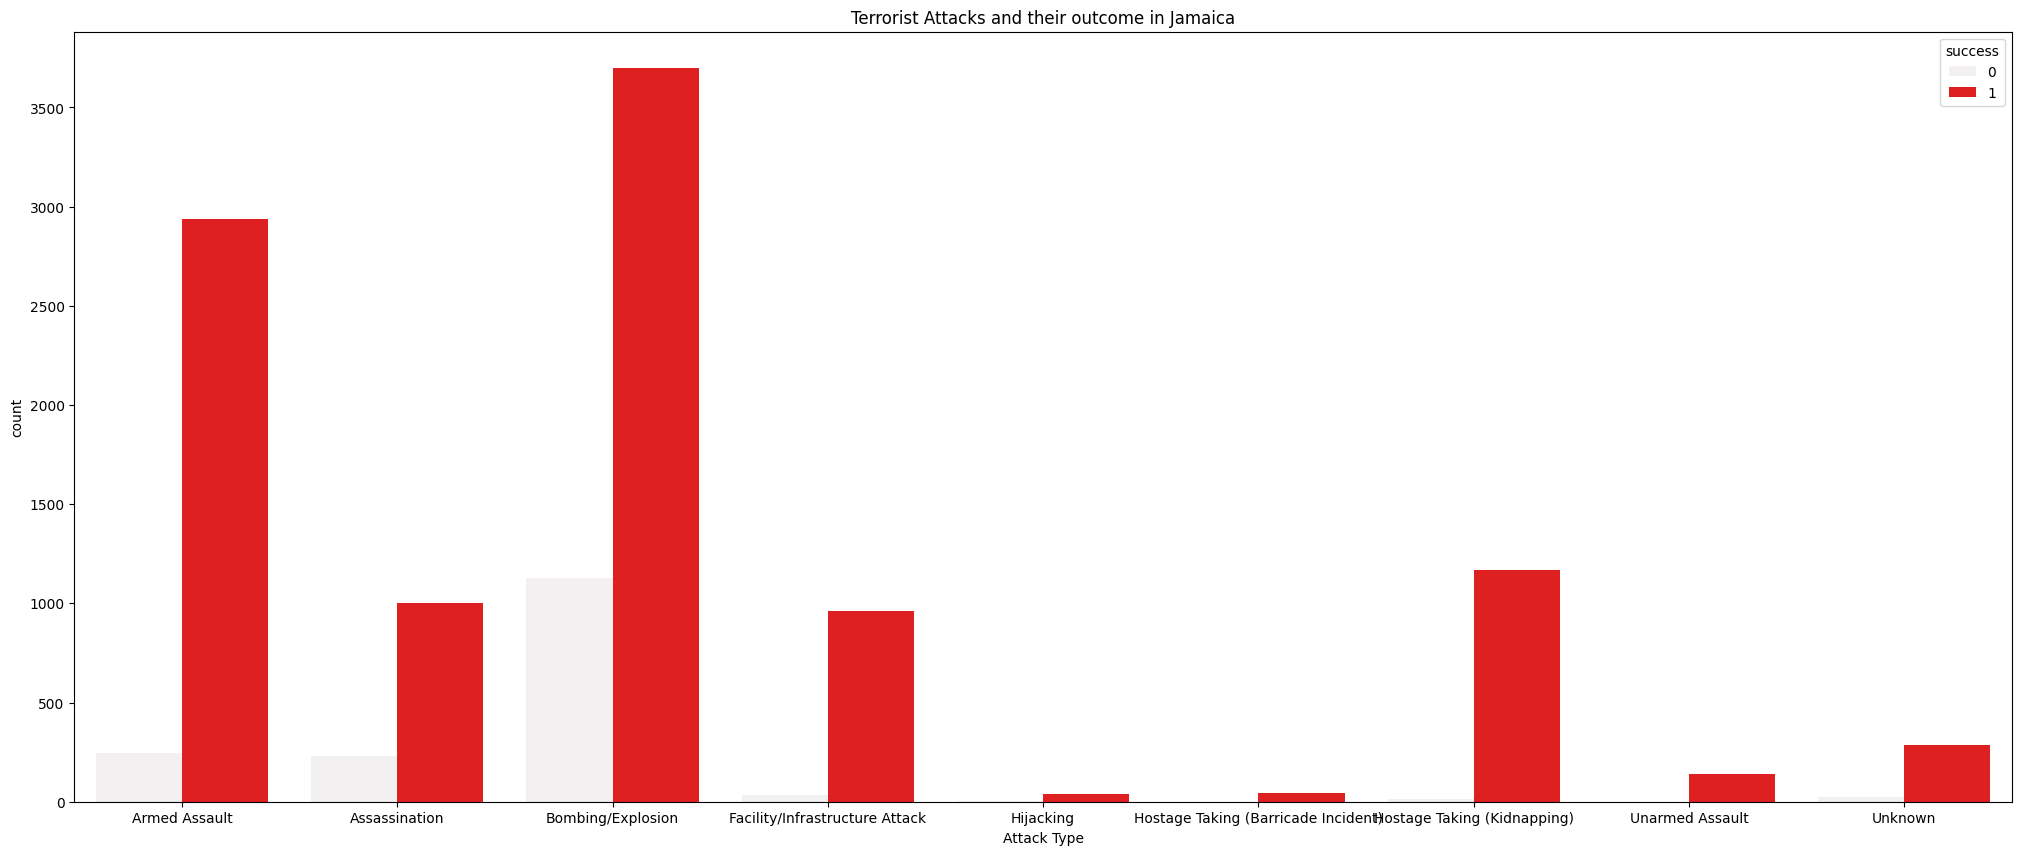

In [41]:
plt.figure(figsize=(25,10))
sns.barplot(x='attacktype1_txt', y='count', hue= 'success', data=india_atype, color="red")
plt.title("Terrorist Attacks and their outcome in Jamaica")
plt.xlabel("Attack Type")

In [42]:
nkillattack_ind = india.groupby('attacktype1_txt')[['nkill']].sum().reset_index()
nkillattack_ind

,attacktype1_txt,nkill
0,Armed Assault,9378.0
1,Assassination,2001.0
2,Bombing/Explosion,5830.0
3,Facility/Infrastructure Attack,135.0
4,Hijacking,42.0
5,Hostage Taking (Barricade Incident),136.0
6,Hostage Taking (Kidnapping),819.0
7,Unarmed Assault,28.0
8,Unknown,972.0


Text(0.5, 0, 'Attack type')

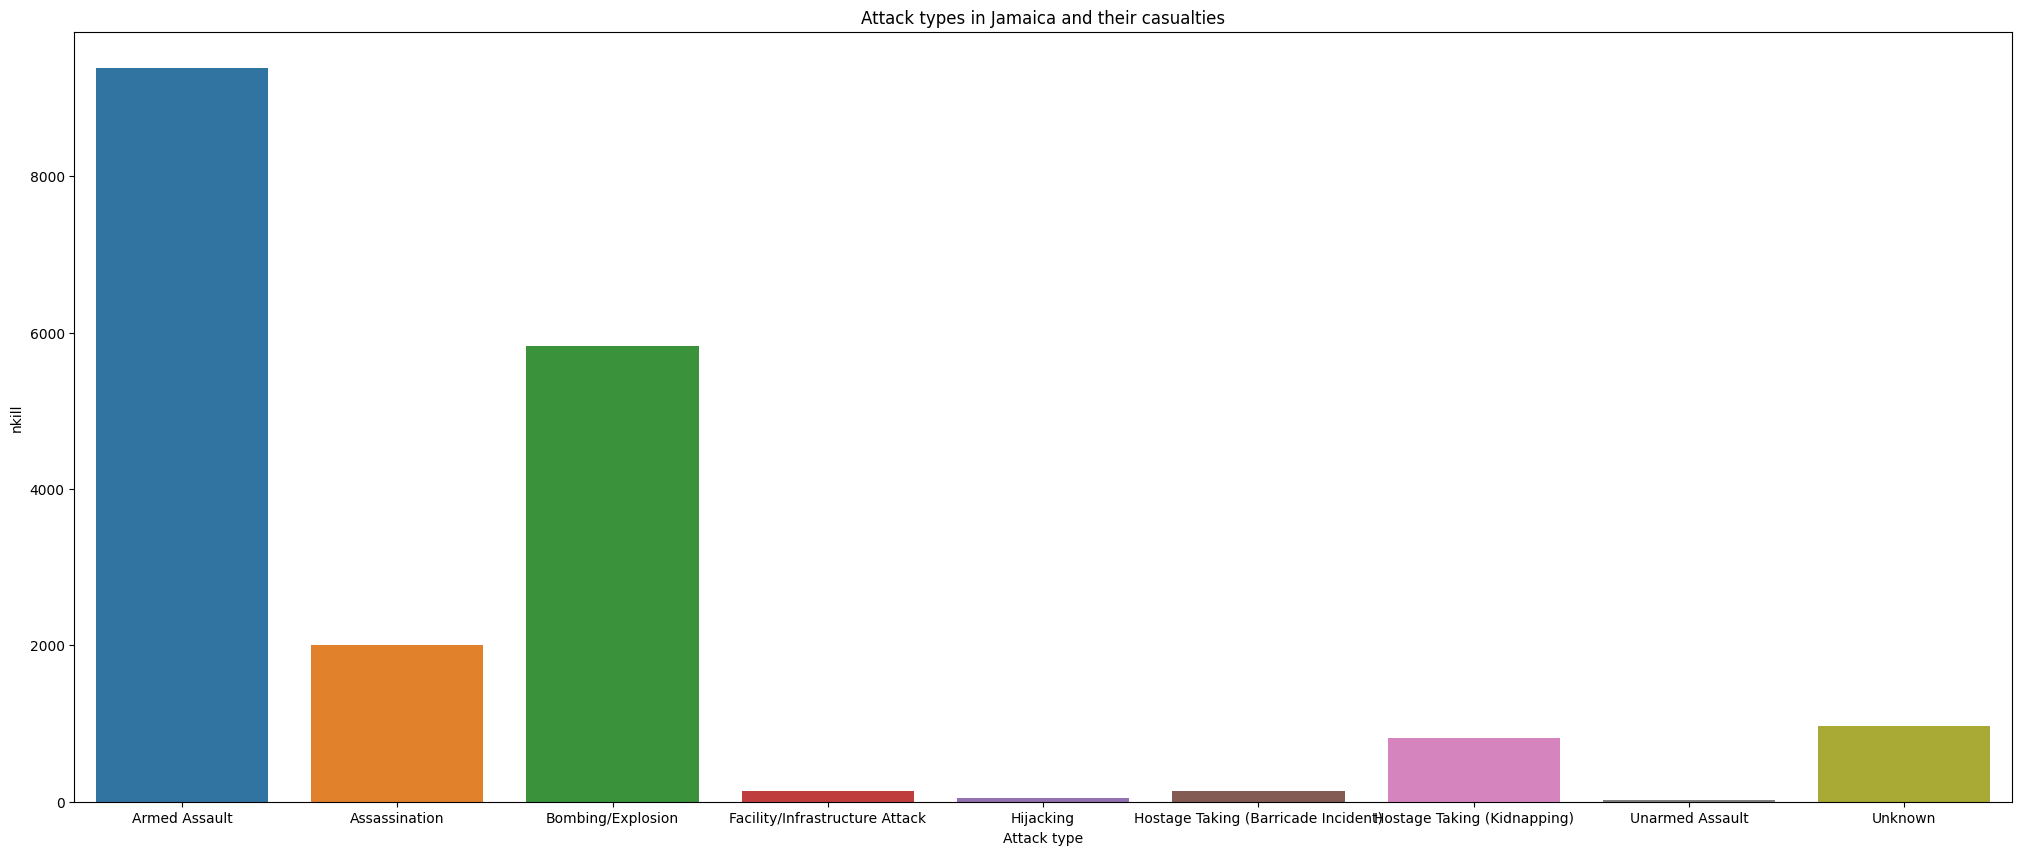

In [43]:
plt.figure(figsize=(25,10))
sns.barplot(x='attacktype1_txt', y='nkill', data=nkillattack_ind)
plt.title("Attack types in Jamaica and their casualties")
plt.xlabel("Attack type")

Terrorist Attacks in Pakistan

In [44]:
pak = gtd_df[(gtd_df['country_txt'] == 'Pakistan')]
pak.head(1)

,eventid,iyear,success,imonth,iday,country_txt,region_txt,suicide,attacktype1_txt,targtype1_txt,target1,nkill
585,197011010001,1970,1,11,1,Pakistan,South Asia,0,Assassination,Government (Diplomatic),Deputy Foreign Minister: Zygfryd Wolniak,4.0


In [46]:
pak_attacks = pak['eventid'].count()
print('There were',pak_attacks ,'attacks in Pakistan.')

There were 14368 attacks in Pakistan.


In [47]:
pak_success = pak.groupby('success').size().reset_index(name='count')
pak_success['percentage'] = pak_success['count'] / pak_attacks * 100
pak_success

,success,count,percentage
0,0,1768,12.305122
1,1,12600,87.694878


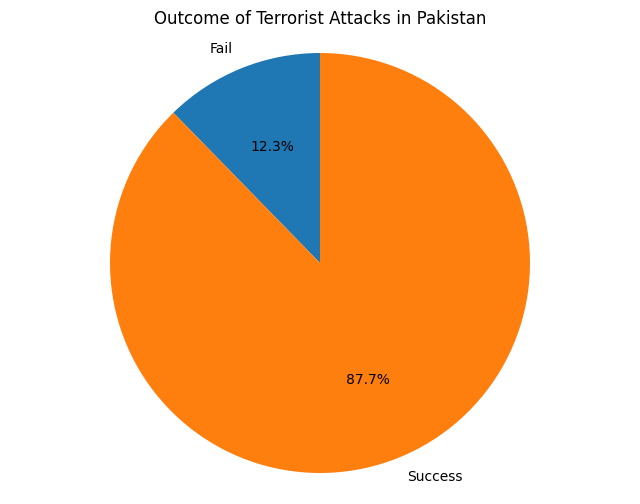

In [55]:
success_labels = {0: 'Fail', 1: 'Success'}
pak_success['success_label'] = pak_success['success'].map(success_labels)
plt.figure(figsize=(8, 6))
plt.pie(pak_success['percentage'], labels=pak_success['success_label'], autopct='%1.1f%%', startangle=90)
plt.title("Outcome of Terrorist Attacks in Pakistan")
plt.axis('equal')  
plt.show()


In [50]:
attack_types_pak = pak.groupby(['attacktype1_txt','success']).size().reset_index(name='count')
attack_types_pak

,attacktype1_txt,success,count
0,Armed Assault,0,173
1,Armed Assault,1,3686
2,Assassination,0,385
3,Assassination,1,1021
4,Bombing/Explosion,0,1155
5,Bombing/Explosion,1,6458
6,Facility/Infrastructure Attack,0,6
7,Facility/Infrastructure Attack,1,294
8,Hijacking,0,2
9,Hijacking,1,17


Text(0.5, 1.0, 'Facility ')

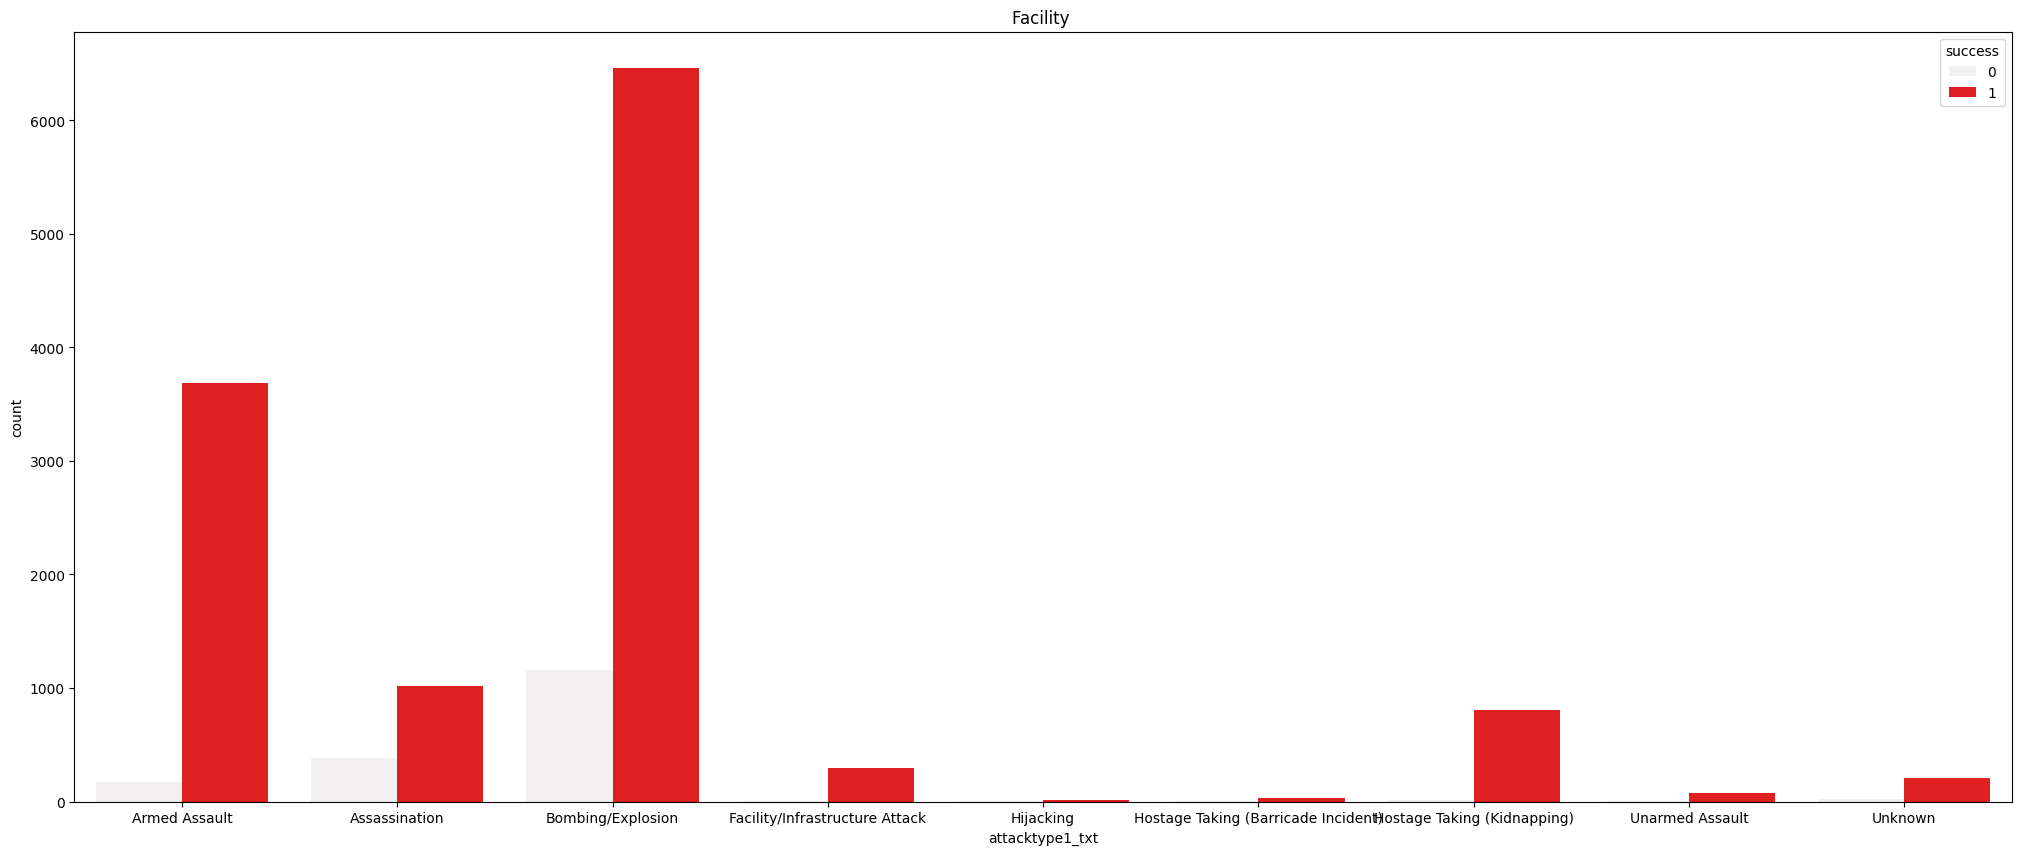

In [51]:
plt.figure(figsize=(25,10))
sns.barplot(x='attacktype1_txt', y='count', hue='success', data=attack_types_pak, color = "red")
plt.title("Facility ")

In [52]:
nkills_pak = pak.groupby('attacktype1_txt')[['nkill']].sum().reset_index()
nkills_pak

,attacktype1_txt,nkill
0,Armed Assault,7796.0
1,Assassination,1920.0
2,Bombing/Explosion,12302.0
3,Facility/Infrastructure Attack,43.0
4,Hijacking,49.0
5,Hostage Taking (Barricade Incident),398.0
6,Hostage Taking (Kidnapping),717.0
7,Unarmed Assault,9.0
8,Unknown,588.0


<Axes: xlabel='attacktype1_txt', ylabel='nkill'>

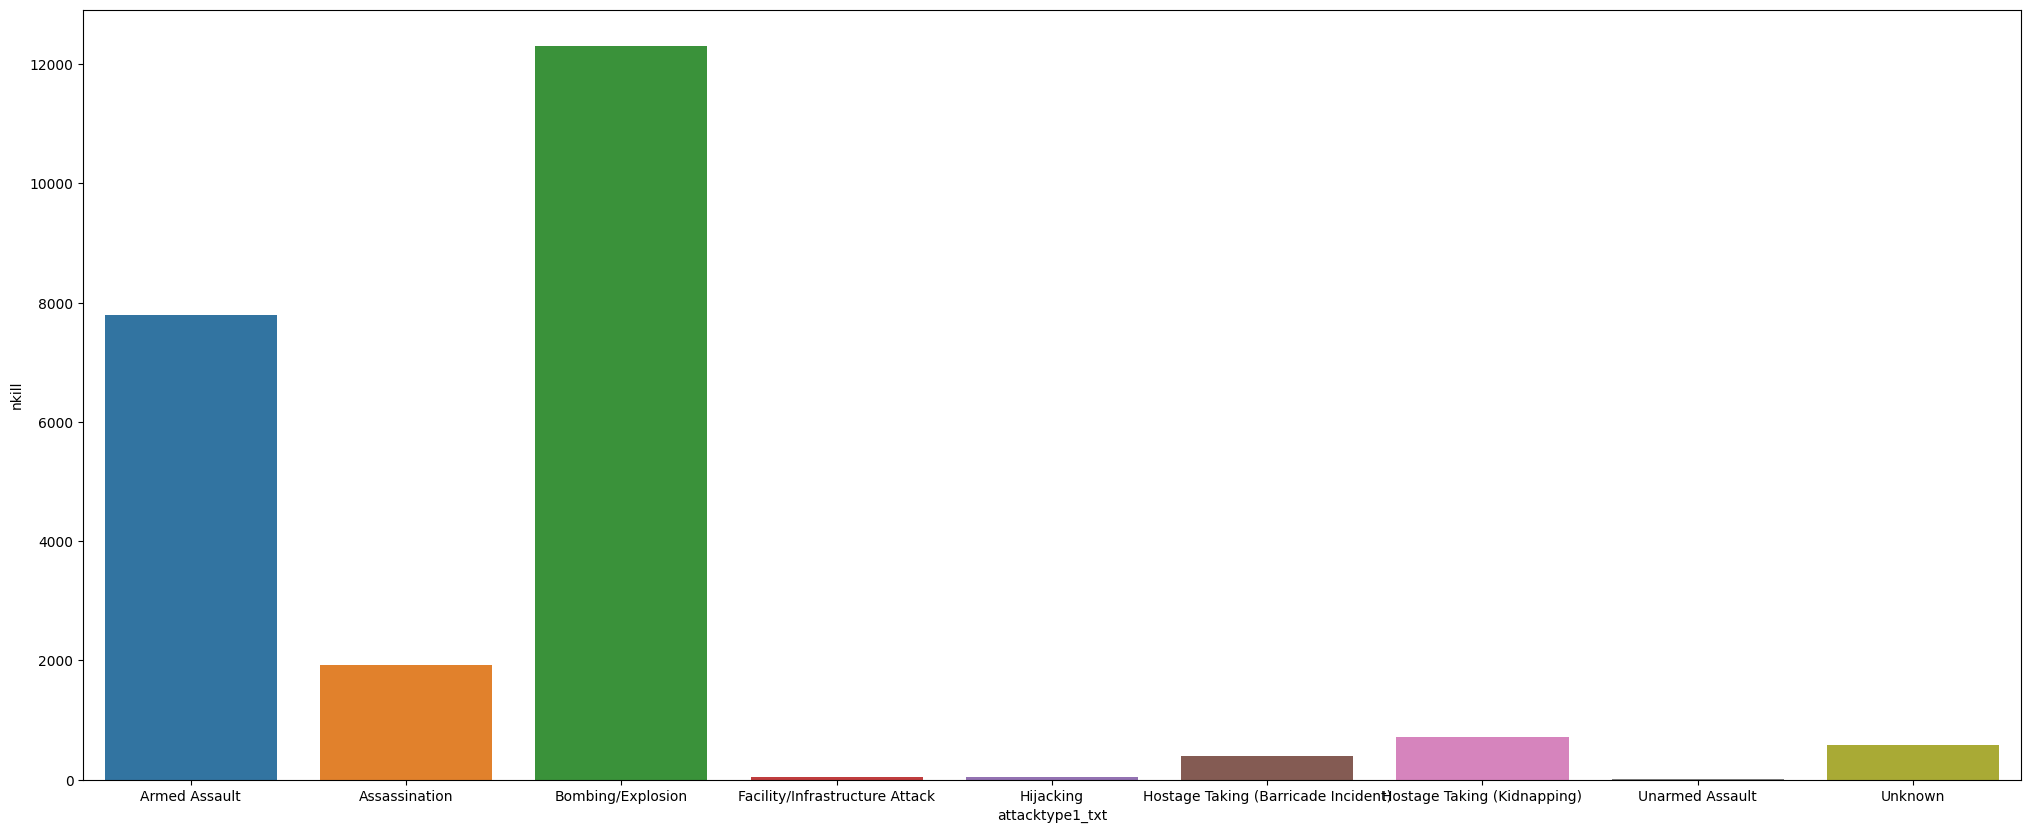

In [53]:
plt.figure(figsize=(25,10))
sns.barplot(x='attacktype1_txt', y='nkill', data=nkills_pak)